In [ ]:

!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from utils import *

In [ ]:
!pip install fastai

from fastai.vision.all import *
path = untar_data(URLs.PETS)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Path.BASE_PATH = path

In [ ]:

path.ls()
(path/"images").ls()

(#7393) [Path('images/basset_hound_113.jpg'),Path('images/Abyssinian_105.jpg'),Path('images/japanese_chin_198.jpg'),Path('images/chihuahua_33.jpg'),Path('images/samoyed_75.jpg'),Path('images/leonberger_8.jpg'),Path('images/pomeranian_197.jpg'),Path('images/leonberger_157.jpg'),Path('images/British_Shorthair_159.jpg'),Path('images/leonberger_176.jpg')...]

In [ ]:
fname = (path/"images").ls()[0]
fname

Path('images/basset_hound_113.jpg')

In [ ]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['basset_hound']

In [ ]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")
dls

In [ ]:
torch.cuda.is_available()

True

In [ ]:

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)
#37 breeds

NameError: ignored

In [ ]:
learn = vision_learner(dls, resnet101, metrics=error_rate)
learn.fine_tune(3)
#37 breeds

epoch,train_loss,valid_loss,error_rate,time
0,0.929448,0.304040,0.092693,01:35


epoch,train_loss,valid_loss,error_rate,time
0,0.398849,0.381239,0.102165,02:06
1,0.337722,0.281620,0.087280,02:05
2,0.161930,0.194127,0.058187,02:05


In [ ]:
learn = vision_learner(dls, alexnet, metrics=error_rate)
learn.fine_tune(3)
#37 breeds

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.626626,0.967336,0.281461,00:59


epoch,train_loss,valid_loss,error_rate,time
0,1.228856,0.763395,0.233424,01:00
1,0.998256,0.644188,0.200947,01:00
2,0.816164,0.607518,0.183356,01:00


In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6, 16, 5),
    nn.Linear(16 * 5 * 5, 120),
    nn.Linear(120, 84),
    nn.Linear(84, 37)


)


nll_loss = nn.NLLLoss()

In [ ]:
learn.show_batch(max_n=35)

NameError: ignored

In [ ]:
learn = Learner(dls, model, opt_func=SGD, loss_func=nn.CrossEntropyLoss, metrics=accuracy)

In [ ]:
learn.fit(n_epoch=2, lr=.001)

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: ignored

In [ ]:
#hide_input
#id interpolations
#caption A comparison of fastai's data augmentation strategy (left) and the traditional approach (right).
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))
# Place an image in the 'images/grizzly.jpg' subfolder where this notebook is located before running this
dls1 = dblock1.dataloaders([(Path.cwd()/'images'/'grizzly.jpg')]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
#x.affine_coord(coord_tfm=coord_tfm, sz=size, mode=mode, pad_mode=pad_mode)
TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);

FileNotFoundError: ignored

In [ ]:
acts = torch.randn((6,2))*2
acts

tensor([[-2.7469,  1.2929],
        [-3.3264, -0.6674],
        [-1.2777,  1.2582],
        [ 1.1777,  2.5570],
        [-1.6045, -3.3076],
        [ 2.2148, -2.0914]])

In [ ]:
acts.sigmoid()

tensor([[0.0603, 0.7846],
        [0.0347, 0.3391],
        [0.2179, 0.7787],
        [0.7645, 0.9280],
        [0.1674, 0.0353],
        [0.9016, 0.1099]])

In [ ]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.0173, 0.0654, 0.0734, 0.2011, 0.8459, 0.9867])

In [ ]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.0173, 0.9827],
        [0.0654, 0.9346],
        [0.0734, 0.9266],
        [0.2011, 0.7989],
        [0.8459, 0.1541],
        [0.9867, 0.0133]])

In [ ]:
targ = tensor([0,1,0,1,1,0])


tensor([0, 1, 0, 1, 1, 0])

In [ ]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.0173, 0.9346, 0.0734, 0.7989, 0.1541, 0.9867])

In [ ]:
#hide_input
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['result'] = sm_acts[range(6), targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

3,7,targ,idx,result
0.017296,0.982704,0,0,0.017296
0.065438,0.934562,1,1,0.934562
0.073375,0.926625,0,2,0.073375
0.201121,0.798879,1,3,0.798879
0.845942,0.154058,1,4,0.154058
0.986695,0.013305,0,5,0.986695


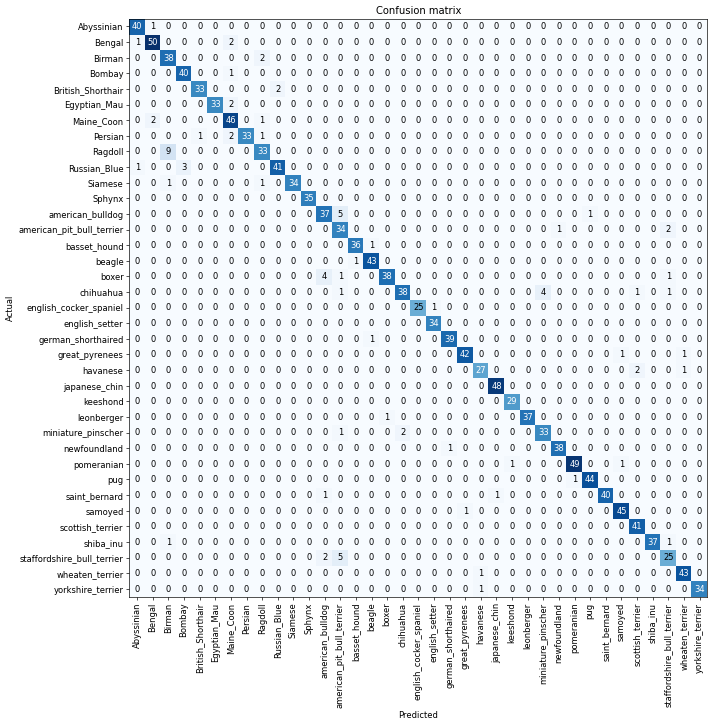

In [ ]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learn.predict("/content/black-footed.jpg")

('Bengal',
 TensorBase(1),
 TensorBase([1.4289e-05, 7.3954e-01, 2.7698e-06, 2.5338e-05, 2.6532e-04,
             2.5739e-01, 3.6807e-04, 8.7553e-05, 1.1394e-05, 5.6411e-06,
             6.5393e-06, 1.5880e-05, 1.4766e-05, 5.6885e-05, 1.4018e-06,
             9.0851e-06, 8.8097e-06, 1.2801e-05, 1.1399e-05, 1.4132e-04,
             4.6439e-05, 8.9004e-06, 2.2079e-05, 3.9831e-05, 6.4935e-06,
             4.5461e-06, 1.1073e-05, 2.1612e-05, 5.4136e-06, 1.7159e-03,
             3.8110e-06, 7.4290e-06, 6.4444e-05, 1.5197e-06, 3.2839e-05,
             1.9432e-06, 1.7498e-05]))

In [ ]:
interp.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('Ragdoll', 'Birman', 6),
 ('Siamese', 'Birman', 6),
 ('basset_hound', 'beagle', 5)]

Bull Terriers are often confused with each other as well as Ragdoll and Birman breeds